# Running - metro maps
Under progress...     
Simplify a track into something with only a few points.

In [2]:
import gpxpy
import gpxpy.gpx
import numpy as np
import os
import glob
import logging
from geopy import distance
from geo import sphere
import matplotlib.pyplot as plt
import cmocean
import matplotlib.patheffects as PathEffects
from GPX2dist_angle_histogram import *

/home/ctroupin/Software/PythonEnvs/Diva-python3.6/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [9]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("starting")

INFO:root:starting


## Data
We work on the tracks of the previous editions of the TransGranCanaria.

In [4]:
datadir = "/data/GPX/TGC/"
filelist = sorted(glob.glob(os.path.join(datadir, "*.gpx")))
logger.info(len(filelist))

INFO:root:12


### List of reference points

In [6]:
poi = {
    "Agaete": (28.100603680849407, -15.71023464202881),
    "Tamadaba": (28.05151142343252, -15.695686340332033), 
    "Altavista": (28.011073467345547, -15.707058906555178), 
    "Artenara": (28.019919976576134, -15.646419525146486),
    "El Carrizal": (27.979394355081844, -15.679072737693788), 
    "Aserrador": (27.959523846972488, -15.627257823944094),
    "Soria": (27.905598262933164, -15.667630434036257),
    "Chira": (27.9045553164476, -15.639939308166506),
    "Cruz Grande": (27.929791798493348, -15.597989559173586),
    "Tunte": (27.925218004667034, -15.573184490203857),
    "Degollada de la Manzanilla": (27.896363096274847, -15.587968826293947),
    "Las Tederas": (27.888350429256295, -15.615906715393068),
    "Ayagaures": (27.856568913927212, -15.604276657104494),
    "Degollada Ancha": (27.83731147807111, -15.600821971893312),
    "Barranco Vicentes": (27.782864653967717, -15.586021542549135),
    "Maspalomas": (27.736130150122456, -15.594642162323),
    "Playa el Inglés": (27.756772707469466, -15.567455291748049),
    "Arteara": (27.849814971084232, -15.565867424011232),
    "Degollada de los Hornos": (27.954832849890025, -15.591959953308107),
    "Roque Nublo": (27.970165494560483, -15.612452030181887),
    "La Data": (27.931061999122466, -15.657663345336916),
    "Cruce GC60": (27.95957122974144, -15.627290010452272),
    "La Culata": (27.977290926571847, -15.600575208663942),
    "Tejeda": (27.994998239396082, -15.615391731262209),
    "Cruz de Tejeda": (28.004660714641087, -15.599298477172853),
    "Llanos del Garañón": (27.968824685794836, -15.58816194534302),
    "Presa de los Hornos": (27.96643203511992, -15.597968101501467),
    "Pico de las Nieves": (27.9624188959672, -15.571977496147158),
    "Degollada de Cruz Chica": (28.01313834929063, -15.595296621322634),
    "Cueva Corcho": (28.024219837406108, -15.58838188648224),
    "Lomo": (28.044253597971338, -15.575104951858522),
    "Valleseco": (28.050223704105676, -15.575040578842165),
    "Valsendero": (28.050479355493035, -15.589170455932619),
    "Fontanales": (28.056984058518484, -15.608739852905275),
}

In [7]:
def get_place_list(lon, lat, poi, disttol=1.):
    
    indexlist = []
    placelist = []
    for places, coords in poi.items():
        #print(coords)
        nlons = len(lon)
        distvec = np.zeros(nlons)
        for i in range(0, len(lon)):
            distvec[i] = distance.vincenty((lat[i], lon[i]), coords).kilometers
        mindist = np.min(distvec)
        logger.debug("Minimal distance: {} km".format(mindist))
        if mindist <= disttol:
            logger.debug("Points {} contained in track".format(places))
            distindex = np.argmin(distvec)
            indexlist.append(distindex)
            placelist.append(places)
    return indexlist, placelist

In [8]:
pp = []
for gpxfiles in filelist:
    lon, lat, ele = get_coords(gpxfiles)
    logger.info(gpxfiles)
    indexlist, placelist = get_place_list(lon, lat, poi)
    pp.append(placelist)

INFO:root:/data/GPX/TGC/TGC-2008.gpx
INFO:root:Minimal distance: 14.617044188626075 km
INFO:root:Minimal distance: 10.654023428491087 km
INFO:root:Minimal distance: 8.51402902002958 km
INFO:root:Minimal distance: 4.8615150071012705 km
INFO:root:Minimal distance: 4.124849050811388 km
INFO:root:Minimal distance: 0.1374569993908869 km
INFO:root:Points Aserrador contained in track
INFO:root:Minimal distance: 0.09636515822270074 km
INFO:root:Points Soria contained in track
INFO:root:Minimal distance: 0.167916868057896 km
INFO:root:Points Chira contained in track
INFO:root:Minimal distance: 0.07699566085179212 km
INFO:root:Points Cruz Grande contained in track
INFO:root:Minimal distance: 0.02147389350411935 km
INFO:root:Points Tunte contained in track
INFO:root:Minimal distance: 0.09685561567627785 km
INFO:root:Points Degollada de la Manzanilla contained in track
INFO:root:Minimal distance: 0.026086631439568294 km
INFO:root:Points Las Tederas contained in track
INFO:root:Minimal distance: 0.

INFO:root:Minimal distance: 6.453985430332012 km
INFO:root:Minimal distance: 8.973172743438308 km
INFO:root:Minimal distance: 9.598474505286656 km
INFO:root:Minimal distance: 9.268606174055293 km
INFO:root:Minimal distance: 9.716417481003589 km
INFO:root:/data/GPX/TGC/TGC-2011.gpx
INFO:root:Minimal distance: 14.62168245297947 km
INFO:root:Minimal distance: 10.61271906635504 km
INFO:root:Minimal distance: 8.585457639340179 km
INFO:root:Minimal distance: 4.791212907014514 km
INFO:root:Minimal distance: 4.221931637009216 km
INFO:root:Minimal distance: 0.0019794410700716535 km
INFO:root:Points Aserrador contained in track
INFO:root:Minimal distance: 0.011152624362578032 km
INFO:root:Points Soria contained in track
INFO:root:Minimal distance: 0.013959502464686593 km
INFO:root:Points Chira contained in track
INFO:root:Minimal distance: 0.011616077339328927 km
INFO:root:Points Cruz Grande contained in track
INFO:root:Minimal distance: 0.0012285390354038084 km
INFO:root:Points Tunte contained 

INFO:root:Minimal distance: 0.006180782129672522 km
INFO:root:Points Degollada de Cruz Chica contained in track
INFO:root:Minimal distance: 0.004288436901402333 km
INFO:root:Points Cueva Corcho contained in track
INFO:root:Minimal distance: 0.00816418118503224 km
INFO:root:Points Lomo contained in track
INFO:root:Minimal distance: 0.5565670067288019 km
INFO:root:Points Valleseco contained in track
INFO:root:Minimal distance: 1.5331554210648854 km
INFO:root:Minimal distance: 3.5735475193669304 km
INFO:root:/data/GPX/TGC/TGC-2014.gpx
INFO:root:Minimal distance: 0.019772508284323878 km
INFO:root:Points Agaete contained in track
INFO:root:Minimal distance: 0.017477456614360835 km
INFO:root:Points Tamadaba contained in track
INFO:root:Minimal distance: 0.003691310355603796 km
INFO:root:Points Altavista contained in track
INFO:root:Minimal distance: 0.011375848607620871 km
INFO:root:Points Artenara contained in track
INFO:root:Minimal distance: 4.3272219658497 km
INFO:root:Minimal distance: 

INFO:root:Minimal distance: 0.009377658841541816 km
INFO:root:Points La Culata contained in track
INFO:root:Minimal distance: 0.023281862690056818 km
INFO:root:Points Tejeda contained in track
INFO:root:Minimal distance: 0.008737504993361539 km
INFO:root:Points Cruz de Tejeda contained in track
INFO:root:Minimal distance: 0.015861022080880388 km
INFO:root:Points Llanos del Garañón contained in track
INFO:root:Minimal distance: 0.003940879468632969 km
INFO:root:Points Presa de los Hornos contained in track
INFO:root:Minimal distance: 0.007360506853376855 km
INFO:root:Points Pico de las Nieves contained in track
INFO:root:Minimal distance: 0.004168093963465978 km
INFO:root:Points Degollada de Cruz Chica contained in track
INFO:root:Minimal distance: 0.9904319706241824 km
INFO:root:Points Cueva Corcho contained in track
INFO:root:Minimal distance: 0.002429681108308563 km
INFO:root:Points Lomo contained in track
INFO:root:Minimal distance: 0.0035848582799780974 km
INFO:root:Points Vallesec

INFO:root:Minimal distance: 0.9184107206540814 km
INFO:root:Points Maspalomas contained in track
INFO:root:Minimal distance: 2.7197396067165975 km
INFO:root:Minimal distance: 3.495071916972086 km
INFO:root:Minimal distance: 0.002508096327628626 km
INFO:root:Points Degollada de los Hornos contained in track
INFO:root:Minimal distance: 0.009943128458841788 km
INFO:root:Points Roque Nublo contained in track
INFO:root:Minimal distance: 4.007150447181645 km
INFO:root:Minimal distance: 1.6183410370793065 km
INFO:root:Minimal distance: 0.009109479117951647 km
INFO:root:Points La Culata contained in track
INFO:root:Minimal distance: 0.02244035389171755 km
INFO:root:Points Tejeda contained in track
INFO:root:Minimal distance: 0.008181897895476128 km
INFO:root:Points Cruz de Tejeda contained in track
INFO:root:Minimal distance: 0.020341259385813566 km
INFO:root:Points Llanos del Garañón contained in track
INFO:root:Minimal distance: 0.0064344522212159295 km
INFO:root:Points Presa de los Hornos c

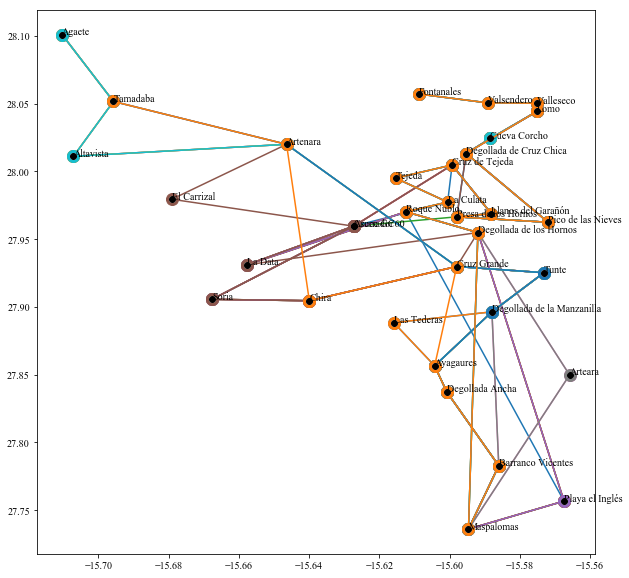

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

for placelist in pp:
    lon2plot = []
    lat2plot = []
    for p in placelist:
        lon2plot.append(poi[p][1])
        lat2plot.append(poi[p][0])
    plt.plot(lon2plot, lat2plot, "o-", markersize=12)
    plt.plot(lon2plot, lat2plot, "wo", markersize=6)
for places, coords in poi.items():
    plt.plot(coords[1], coords[0], "ko")
    plt.text(coords[1], coords[0], places)
plt.show()
plt.close()